# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [103]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress


from api_keys import weather_api_key


from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [104]:

lat_lngs = []

cities = []


lat_range = (-90, 90)
lng_range = (-180, 180)


lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)


for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
   
    if city not in cities:
        cities.append(city)


print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 602


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [105]:
url = "http://api.openweathermap.org/data/2.5/weather?"



city_data = []


print("Beginning Data Retrieval     ")
print("-----------------------------")


record_count = 1
set_count = 1



for i, city in enumerate(cities):
        
 
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    city_url = f"{url}appid={weather_api_key}&q={city}&units={units}"
    
   
    
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    
    record_count += 1

   
    try:
        
        cw = requests.get(city_url).json()

        
        if 'main' in cw and 'temp_max' in cw['main']:
            
            city_max_temp = cw["main"]["temp_max"]
            
           
            city_data.append({"City": city, 
                              "Lat": cw["coord"]["lat"], 
                              "Lng": cw["coord"]["lon"], 
                              "Max Temp": city_max_temp,
                              "Humidity": cw["main"]["humidity"],
                              "Cloudiness": cw["clouds"]["all"],
                              "Wind Speed": cw["wind"]["speed"],
                              "Country": cw["sys"]["country"],
                              "Date": cw["dt"]})
        else:
            print(f"Max temperature not found for {city}. Skipping...")
    except Exception as e:
        print(f"Error fetching data for {city}: {e}")
        pass
              

print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | grytviken
Processing Record 2 of Set 1 | at taj
Processing Record 3 of Set 1 | vingt cinq
Max temperature not found for vingt cinq. Skipping...
Processing Record 4 of Set 1 | avarua
Processing Record 5 of Set 1 | espargos
Max temperature not found for espargos. Skipping...
Processing Record 6 of Set 1 | bredasdorp
Processing Record 7 of Set 1 | olonkinbyen
Processing Record 8 of Set 1 | colac
Processing Record 9 of Set 1 | iqaluit
Processing Record 10 of Set 1 | aykhal
Processing Record 11 of Set 1 | susuman
Processing Record 12 of Set 1 | gurupi
Processing Record 13 of Set 1 | longyearbyen
Processing Record 14 of Set 1 | inirida
Processing Record 15 of Set 1 | port-aux-francais
Processing Record 16 of Set 1 | tura
Processing Record 17 of Set 1 | waitangi
Processing Record 18 of Set 1 | prado
Processing Record 19 of Set 1 | saffle
Max temperature not found for saffle. Skipping...
Processing Recor

Processing Record 28 of Set 4 | ambon
Processing Record 29 of Set 4 | marsabit
Processing Record 30 of Set 4 | moranbah
Processing Record 31 of Set 4 | hotan
Processing Record 32 of Set 4 | mormugao
Processing Record 33 of Set 4 | milagros
Processing Record 34 of Set 4 | suai
Max temperature not found for suai. Skipping...
Processing Record 35 of Set 4 | altai
Processing Record 36 of Set 4 | padang
Processing Record 37 of Set 4 | smaliavicy
Max temperature not found for smaliavicy. Skipping...
Processing Record 38 of Set 4 | kibre mengist
Processing Record 39 of Set 4 | yomju-up
Processing Record 40 of Set 4 | borba
Processing Record 41 of Set 4 | sucre
Processing Record 42 of Set 4 | guayaramerin
Processing Record 43 of Set 4 | lorengau
Processing Record 44 of Set 4 | laayoune plage
Max temperature not found for laayoune plage. Skipping...
Processing Record 45 of Set 4 | katsuren-haebaru
Processing Record 46 of Set 4 | jamestown
Processing Record 47 of Set 4 | nova vicosa
Processing R

Processing Record 16 of Set 8 | constitucion
Processing Record 17 of Set 8 | pisco
Processing Record 18 of Set 8 | dhidhdhoo
Processing Record 19 of Set 8 | ocean shores
Processing Record 20 of Set 8 | viedma
Processing Record 21 of Set 8 | brokopondo
Processing Record 22 of Set 8 | extrema
Processing Record 23 of Set 8 | orkney
Processing Record 24 of Set 8 | farsan
Processing Record 25 of Set 8 | ilebo
Processing Record 26 of Set 8 | corsicana
Processing Record 27 of Set 8 | al bardiyah
Processing Record 28 of Set 8 | turpan
Processing Record 29 of Set 8 | severo-yeniseyskiy
Processing Record 30 of Set 8 | chernyshevskiy
Processing Record 31 of Set 8 | saipan
Processing Record 32 of Set 8 | ta`u
Processing Record 33 of Set 8 | jaworze
Processing Record 34 of Set 8 | nanning
Processing Record 35 of Set 8 | newman
Processing Record 36 of Set 8 | deniliquin
Processing Record 37 of Set 8 | christchurch
Processing Record 38 of Set 8 | tadine
Processing Record 39 of Set 8 | ambo
Processing

Processing Record 4 of Set 12 | nishifukuma
Processing Record 5 of Set 12 | pematangsiantar
Processing Record 6 of Set 12 | ejido benito juarez
Max temperature not found for ejido benito juarez. Skipping...
Processing Record 7 of Set 12 | turkmenbasy
Processing Record 8 of Set 12 | khenchela
Processing Record 9 of Set 12 | abu jibeha
Processing Record 10 of Set 12 | labuan
Processing Record 11 of Set 12 | nacala
Processing Record 12 of Set 12 | nago
Processing Record 13 of Set 12 | ust'-uda
Processing Record 14 of Set 12 | maceio
Processing Record 15 of Set 12 | lepsy
Processing Record 16 of Set 12 | erseke
Processing Record 17 of Set 12 | torshalla
Processing Record 18 of Set 12 | hayma'
Max temperature not found for hayma'. Skipping...
Processing Record 19 of Set 12 | tete
Processing Record 20 of Set 12 | arish
Processing Record 21 of Set 12 | broken hill
Processing Record 22 of Set 12 | i-n-salah
Processing Record 23 of Set 12 | tanout
Processing Record 24 of Set 12 | yanjiang
Proce

In [208]:
city_data_df = pd.DataFrame(city_data)


city_data_df.count()

City          574
Lat           574
Lng           574
Max Temp      574
Humidity      574
Cloudiness    574
Wind Speed    574
Country       574
Date          574
dtype: int64

In [210]:
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,grytviken,-54.2811,-36.5092,2.58,44,16,5.07,GS,1696152472
1,at taj,24.2049,23.2857,31.37,24,100,7.12,LY,1696152473
2,avarua,-21.2078,-159.7750,25.03,94,75,3.60,CK,1696152473
3,bredasdorp,-34.5322,20.0403,16.94,52,0,4.95,ZA,1696152375
4,olonkinbyen,70.9221,-8.7187,0.82,65,100,2.83,SJ,1696152474


In [211]:
city_data_df.to_csv("cities.csv", index_label="City_ID")

In [212]:

city_data_df = pd.read_csv("cities.csv", index_col="City_ID")


city_data_df.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,grytviken,-54.2811,-36.5092,2.58,44,16,5.07,GS,1696152472
1,at taj,24.2049,23.2857,31.37,24,100,7.12,LY,1696152473
2,avarua,-21.2078,-159.7750,25.03,94,75,3.60,CK,1696152473
3,bredasdorp,-34.5322,20.0403,16.94,52,0,4.95,ZA,1696152375
4,olonkinbyen,70.9221,-8.7187,0.82,65,100,2.83,SJ,1696152474


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

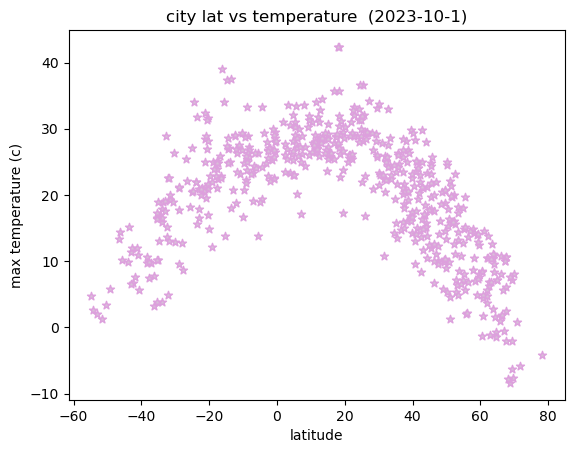

In [213]:
x_v = city_data_df["Lat"].astype("float")
y_v = city_data_df["Max Temp"].astype("float")

plt.scatter(x_v, y_v, marker = "*", facecolors ="thistle", edgecolors="plum")

plt.xlabel('latitude')
plt.ylabel('max temperature (c)')
plt.title('city lat vs temperature  (2023-10-1)')


plt.savefig("../the_output_data/Fig1.png")


plt.show()

#### Latitude Vs. Humidity

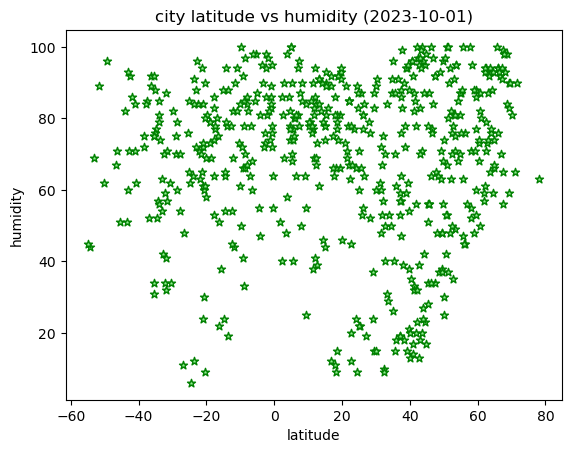

In [214]:
x_v = city_data_df["Lat"].astype("float")
y_v = city_data_df["Humidity"].astype("float")

plt.scatter(x_v, y_v, marker = "*", facecolors ="lightgreen", edgecolors="green")

plt.xlabel('latitude')
plt.ylabel('humidity')
plt.title('city latitude vs humidity (2023-10-01)')

plt.savefig("../the_output_data/Fig2.png")

plt.show()

#### Latitude Vs. Cloudiness

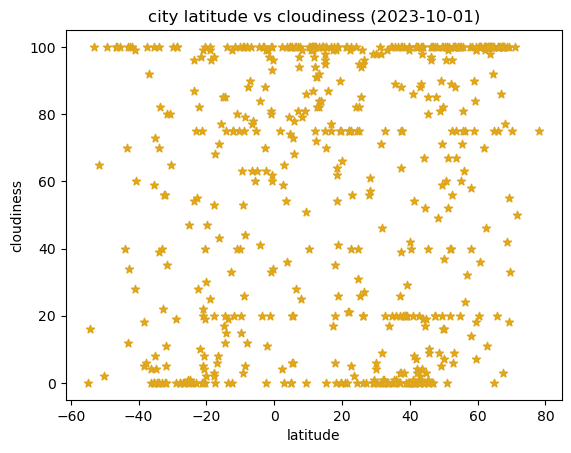

In [215]:
x_v = city_data_df["Lat"].astype("float")
y_v = city_data_df["Cloudiness"].astype("float")

plt.scatter(x_v, y_v, marker = "*", facecolors ="orange", edgecolors="goldenrod")

plt.xlabel('latitude')
plt.ylabel('cloudiness')
plt.title('city latitude vs cloudiness (2023-10-01)')

plt.savefig("../the_output_data/Fig3.png")

plt.show()

#### Latitude vs. Wind Speed Plot

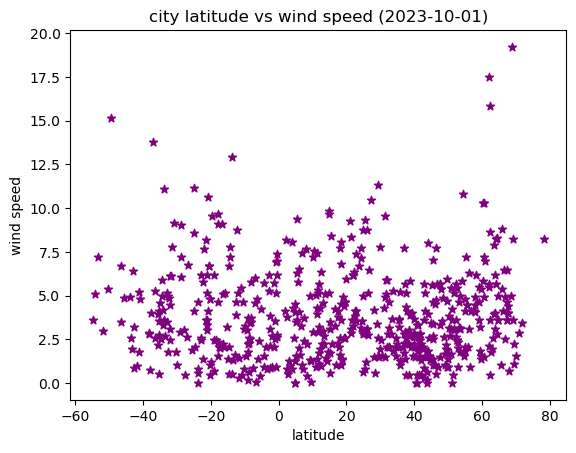

In [216]:
x_v = city_data_df["Lat"].astype("float")
y_v = city_data_df["Wind Speed"].astype("float")

plt.scatter(x_v, y_v, marker = "*", facecolors ="purple", edgecolors="purple")

plt.xlabel('latitude')
plt.ylabel('wind speed')
plt.title('city latitude vs wind speed (2023-10-01)')

plt.savefig("../the_output_data/Fig4.png")

plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [218]:
north_df = city_data_df.loc[city_data_df['Lat'] >= 0]

north_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,at taj,24.2049,23.2857,31.37,24,100,7.12,LY,1696152473
4,olonkinbyen,70.9221,-8.7187,0.82,65,100,2.83,SJ,1696152474
6,iqaluit,63.7506,-68.5145,2.85,93,100,3.09,CA,1696152475
7,aykhal,66.0000,111.5000,1.71,94,100,5.36,RU,1696152475
8,susuman,62.7833,148.1667,-1.12,73,11,1.79,RU,1696152476


In [219]:
south_df = city_data_df.loc[city_data_df['Lat'] <= 0]

south_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,grytviken,-54.2811,-36.5092,2.58,44,16,5.07,GS,1696152472
2,avarua,-21.2078,-159.7750,25.03,94,75,3.60,CK,1696152473
3,bredasdorp,-34.5322,20.0403,16.94,52,0,4.95,ZA,1696152375
5,colac,-38.3333,143.5833,10.65,72,18,2.82,AU,1696152475
9,gurupi,-11.7292,-49.0686,26.37,44,20,1.43,BR,1696152197


###  Temperature vs. Latitude Linear Regression Plot

the r value is: 0.6789873751469361


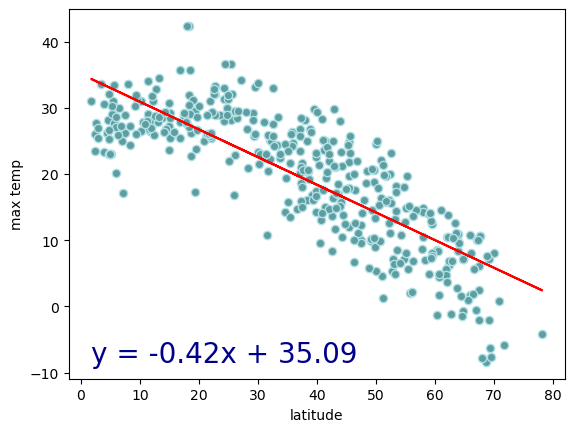

In [220]:
x = north_df['Lat'].astype("float")
y = north_df['Max Temp'].astype("float")


(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


plt.scatter(x, y, marker = "o", facecolors ="cadetblue", edgecolors="powderblue")


plt.plot(x,regress_values,"r-")

plt.annotate(line_eq, (x.min(), y.min()), fontsize=20, color="darkblue")


plt.xlabel('latitude')
plt.ylabel('max temp')


print(f"the r value is: {rvalue**2}")


plt.show()

the r value is: 0.5499040478526926


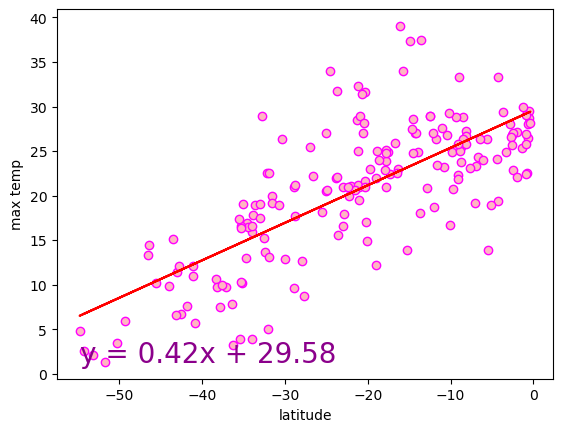

In [221]:
x = south_df['Lat'].astype("float")
y = south_df['Max Temp'].astype("float")


(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))



plt.scatter(x, y, marker = "o", facecolors ="lightpink", edgecolors="magenta")



plt.plot(x,regress_values,"r-")

plt.annotate(line_eq, (x.min(), y.min()), fontsize=20, color="darkmagenta")



plt.xlabel('latitude')
plt.ylabel('max temp')


print(f"the r value is: {rvalue**2}")


plt.show()

**Discussion about the linear relationship:** In the Northern Hemisphere, there is a negative slope observed in the scatterplot. This indicates that as you move towards higher latitudes in the Northern Hemisphere, temperatures tend to decrease. In simpler terms, the data suggests that colder temperatures are encountered as one moves towards the northern regions. Conversely, in the Southern Hemisphere, there is a positive slope evident in the scatterplot. This signifies that as you travel towards lower latitudes in the Southern Hemisphere, temperatures tend to increase. In other words, warmer temperatures are generally found as you journey towards the southern regions.

### Humidity vs. Latitude Linear Regression Plot

the r value is: 0.0021810728798856106


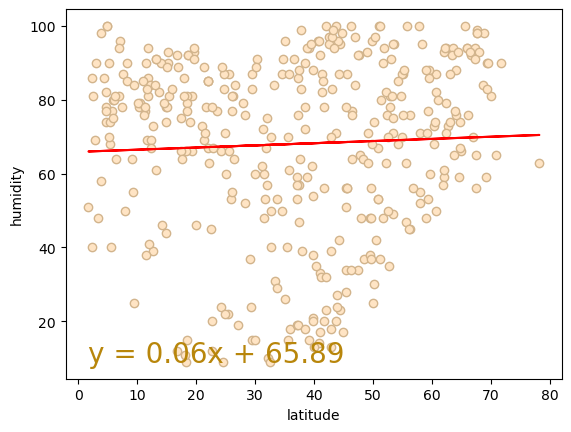

In [222]:
x = north_df['Lat'].astype("float")
y = north_df['Humidity'].astype("float")


(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))



plt.scatter(x, y, marker = "o", facecolors ="bisque", edgecolors="tan")



plt.plot(x,regress_values,"r-")

plt.annotate(line_eq, (x.min(), y.min()), fontsize=20, color="darkgoldenrod")

plt.xlabel('latitude')
plt.ylabel('humidity')


print(f"the r value is: {rvalue**2}")


plt.show()

the r value is: 0.02722161923515175


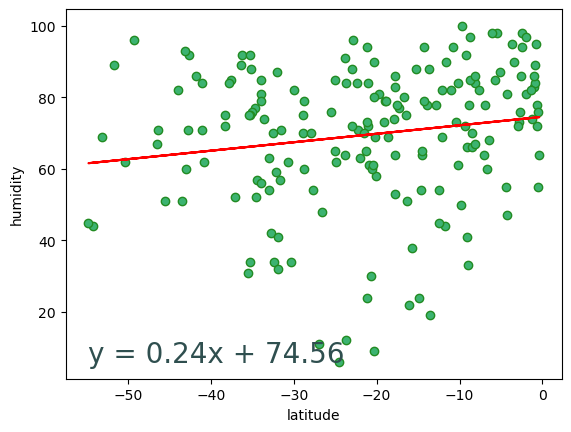

In [223]:
x = south_df['Lat'].astype("float")
y = south_df['Humidity'].astype("float")


(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


plt.scatter(x, y, marker = "o", facecolors ="mediumseagreen", edgecolors="forestgreen")



plt.plot(x,regress_values,"r-")

plt.annotate(line_eq, (x.min(), y.min()), fontsize=20, color="darkslategrey")


plt.xlabel('latitude')
plt.ylabel('humidity')


print(f"the r value is: {rvalue**2}")


plt.show()

**Discussion about the linear relationship:** In both scatterplots, latitude and humidity exhibit a positive relationship. Humidity tends to increase as you move away from the equator in both the Northern and Southern Hemispheres. Humidity levels are generally higher in the Northern Hemisphere, while similar trends are observed in the Southern Hemisphere.

### Cloudiness vs. Latitude Linear Regression Plot

the r value is: 0.0015253889776878195


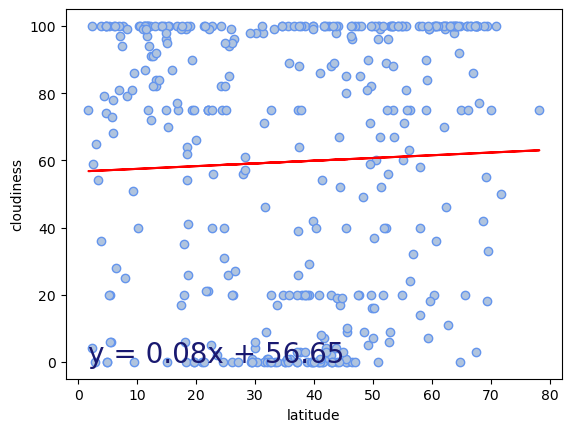

In [224]:

x = north_df['Lat'].astype("float")
y = north_df['Cloudiness'].astype("float")


(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))



plt.scatter(x, y, marker = "o", facecolors ="lightsteelblue", edgecolors="cornflowerblue")



plt.plot(x,regress_values,"r-")

plt.annotate(line_eq, (x.min(), y.min()), fontsize=20, color="midnightblue")


plt.xlabel('latitude')
plt.ylabel('cloudiness')

print(f"the r value is: {rvalue**2}")


plt.show()

the r value is: 0.02994654604949523


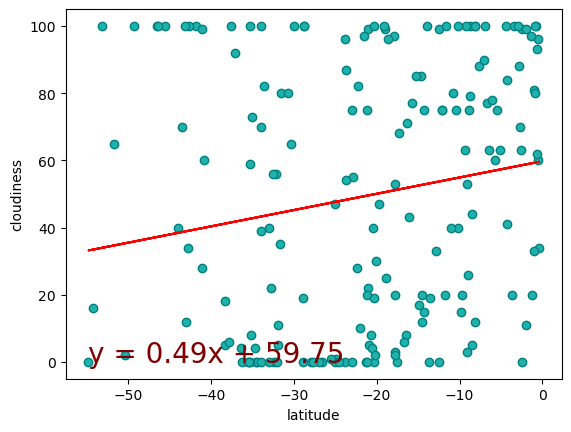

In [225]:

x = south_df['Lat'].astype("float")
y = south_df['Cloudiness'].astype("float")


(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))



plt.scatter(x, y, marker = "o", facecolors ="lightseagreen", edgecolors="teal")



plt.plot(x,regress_values,"r-")

plt.annotate(line_eq, (x.min(), y.min()), fontsize=20, color="maroon")


plt.xlabel('latitude')
plt.ylabel('cloudiness')

print(f"the r value is: {rvalue**2}")

plt.show()

**Discussion about the linear relationship:** In the scatterplots presented above, we illustrate the connection between cloudiness and latitude. In both of these scatterplots, a positive linear trend is apparent. This indicates that as you move towards higher latitudes in either the Northern or Southern Hemisphere, there is a corresponding increase in cloudiness levels.

### Wind Speed vs. Latitude Linear Regression Plot

the r value is: 0.0072589874408064345


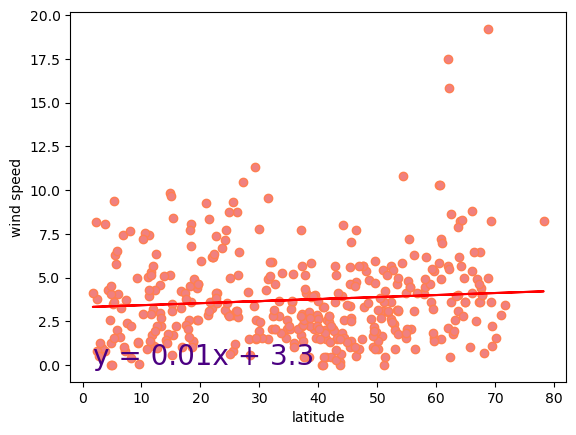

In [226]:

x = north_df['Lat'].astype("float")
y = north_df['Wind Speed'].astype("float")


(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


plt.scatter(x, y, marker = "o", facecolors ="lightcoral", edgecolors="coral")



plt.plot(x,regress_values,"r-")

plt.annotate(line_eq, (x.min(), y.min()), fontsize=20, color="indigo")


plt.xlabel('latitude')
plt.ylabel('wind speed')

print(f"the r value is: {rvalue**2}")


plt.show()

the r value is: 0.028821991908215376


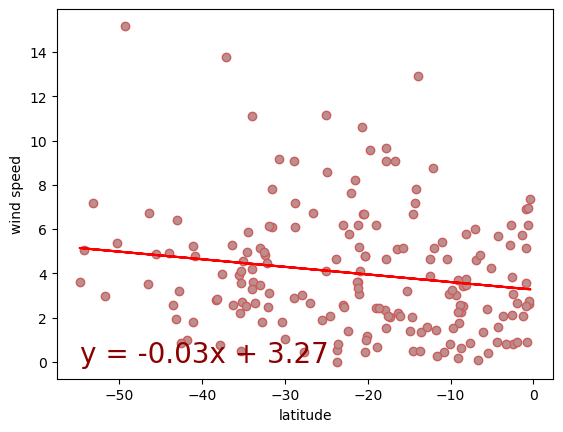

In [227]:

x = south_df['Lat'].astype("float")
y = south_df['Wind Speed'].astype("float")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


plt.scatter(x, y, marker = "o", facecolors ="rosybrown", edgecolors="indianred")



plt.plot(x,regress_values,"r-")

plt.annotate(line_eq, (x.min(), y.min()), fontsize=20, color="darkred")


plt.xlabel('latitude')
plt.ylabel('wind speed')


print(f"the r value is: {rvalue**2}")


plt.show()

**Discussion about the linear relationship:** In the above scatterplots, we depict the association between wind speed and latitude. The scatterplot for the Northern Hemisphere exhibits a positive linear trend, while the Southern Hemisphere scatterplot displays a negative slope. In the Northern Hemisphere, this indicates that wind speed experiences an increase, albeit at a gradual pace, as one moves northward. Conversely, in the Southern Hemisphere, there is a decline in wind speed as you head southward. The slopes of these equations signify the rate of change in wind speed concerning latitude shifts within each hemisphere.